# Pymaceuticals Inc.
---

### Analysis

I was unable to complete the analysis due to being unable to get the quartiles loop working. I did get the ETL functions, basic stats, and basic graphs done.

### Basic charts
Here we see the total recorded timepoints for each drug regimen after removing duplicates. This indicates we have a solid base of data for statistical work.
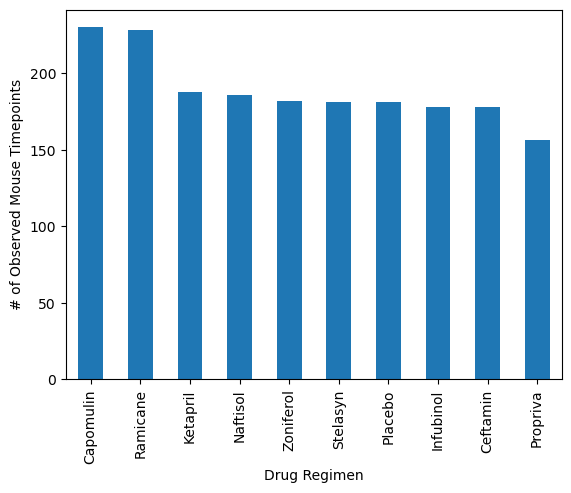

It is useful in stats to know if there is any skewing of the original dataset, such as with an imbalanced mouse sex distribution in the data. The pie chart below shows males and females are almost exactly equal.
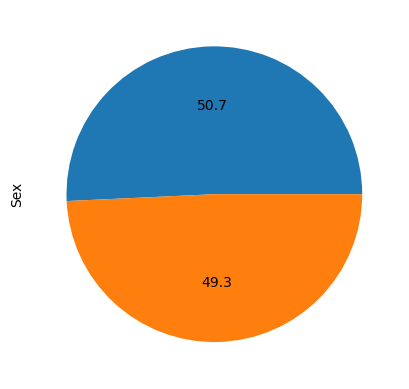


## Python & dataset prep

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge=pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Not required but potentially useful # samples per Mouse ID
merge['Mouse ID'].value_counts()

Mouse ID
g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: count, Length: 249, dtype: int64

In [16]:
# Explore the merged df's basic makeup
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [4]:
# Checking the number of mice.
merge['Mouse ID'].nunique()

249

In [5]:
merge.tail()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17
1892,m601,45,28.430964,1,Capomulin,Male,22,17


In [15]:
merge.loc[merge['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [18]:
# Slice off duplicated Mouse ID and Timepoint rows
dups=merge[merge.duplicated(subset=['Mouse ID','Timepoint'])]
dups

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
merge.loc[merge['Mouse ID']=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [ ]:
### Clean data to remove duplicates

In [28]:
# Create a cleaned df that removes duplicated Mouse ID + Timepoint rows
clean=merge.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1888 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1888 non-null   object 
 1   Timepoint           1888 non-null   int64  
 2   Tumor Volume (mm3)  1888 non-null   float64
 3   Metastatic Sites    1888 non-null   int64  
 4   Drug Regimen        1888 non-null   object 
 5   Sex                 1888 non-null   object 
 6   Age_months          1888 non-null   int64  
 7   Weight (g)          1888 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.8+ KB


In [29]:
# show first 5 rows in the clean df
clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [27]:
# Not sure why the duplicate wasn't removed from in the df in two cells above
# should have 248
clean['Mouse ID'].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Not sure what this is asking for...

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stats=clean.groupby(['Drug Regimen'],as_index=False).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
stats

Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.393463  50.909965  43.138803  6.568014  0.525862
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

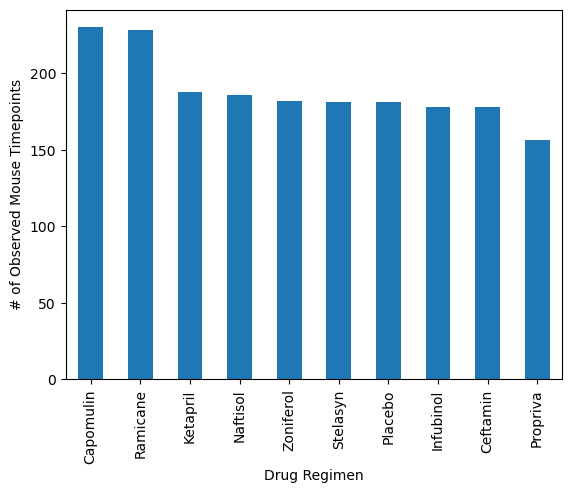

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean['Drug Regimen'].value_counts().plot.bar()
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

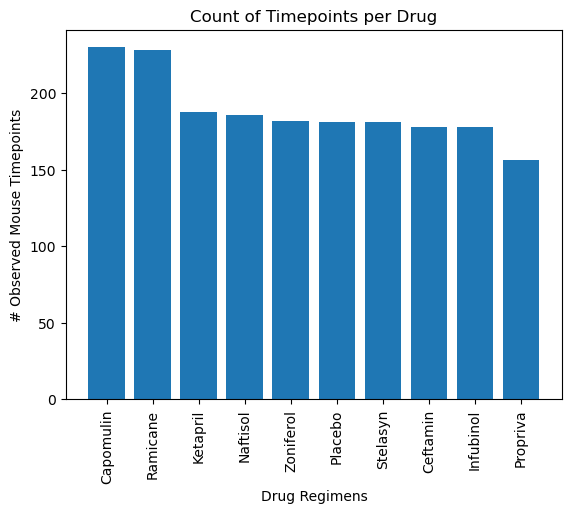

In [64]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# There's likely some extraneous code below, somewhat due to the many, many interations I went through trying to get this chart right
drugs=clean['Drug Regimen']
times=clean['Timepoint']
drugCounts=clean.groupby('Drug Regimen').size().sort_values(ascending=False)
plt.bar(drugCounts.index,drugCounts.values)
plt.title("Count of Timepoints per Drug")
plt.xlabel("Drug Regimens")
plt.ylabel('# Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

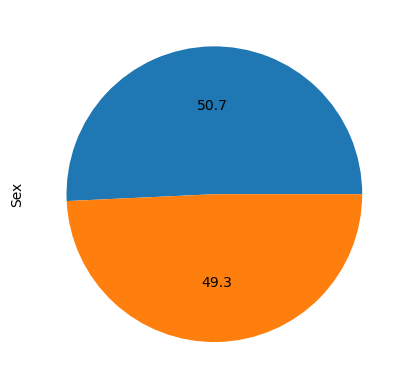

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sexCounts=clean.groupby('Sex').size().sort_values(ascending=False)
plt.pie(sexCounts, autopct='%.1f')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [108]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mostRecent=clean.sort_values('Timepoint',ascending=False)
print(mostRecent)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
1892     m601         45           28.430964                 1    Capomulin   
799      j984         45           70.653832                 1     Stelasyn   
1784     w914         45           36.041047                 2    Capomulin   
134      n304         45           63.586395                 4     Naftisol   
859      m269         45           75.123690                 1     Stelasyn   
...       ...        ...                 ...               ...          ...   
1139     i669          0           45.000000                 0      Placebo   
1135     r850          0           45.000000                 0      Placebo   
1125     a262          0           45.000000                 0      Placebo   
1115     q787          0           45.000000                 0      Placebo   
949      g296          0           45.000000                 0    Zoniferol   

         Sex  Age_months  Weight (g)  
1892    Male

In [139]:
# List all treatments in the study
treatments=set(clean['Drug Regimen'])
print(treatments)
fourDrugs=['Capomulin','Ramicane','Infubinol','Ceftamin']
tumorVols=[]

mask=mostRecent['Drug Regimen'].isin(fourDrugs)
fourDrugRows=mostRecent[mask]
fourDrugRows
print(fourDrugRows)

{'Capomulin', 'Ketapril', 'Propriva', 'Stelasyn', 'Ramicane', 'Infubinol', 'Naftisol', 'Zoniferol', 'Ceftamin', 'Placebo'}
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
1892     m601         45           28.430964                 1    Capomulin   
1784     w914         45           36.041047                 2    Capomulin   
1669     i334         45           36.374510                 2     Ramicane   
1794     i738         45           37.311846                 2    Capomulin   
907      a203         45           67.973419                 2    Infubinol   
...       ...        ...                 ...               ...          ...   
1614     p438          0           45.000000                 0     Ceftamin   
1613     x226          0           45.000000                 0     Ceftamin   
1304     x822          0           45.000000                 0     Ceftamin   
891      c895          0           45.000000                 0    Infubinol   
898     

In [142]:
# I couldn't get this to work, spent hours on it and gave up
regimen=0
for drug in fourDrugs:
    quartiles=fourDrugRows[drug].quantile([.25,.5,.75]).round(2)
    lowerq=quartiles[.25].round(2)
    upperq=quartiles[.75].round(2)
    iqr=round(upperq-lowerq,2)
    lowerBound=round(lowerq-(1.5*iqr),2)
    upperBound=round(upperq-(1.5*iqr),2)
    
    if treatment == 0:
        print(f"-----------{drug}-----------")
        print(f"Lower quartile = {lowerq}")
        print(f"Upper quartiles = {upperq}")
        print(f"Interquartile range = {iqr}")
        print(f"Values below {lowerBound} could be small outliers")
        print(f"Values above {upperBound} could be large outliers")
        print()
        regimen+=1

KeyError: 'Capomulin'

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
fourDrugs=['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorVols=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


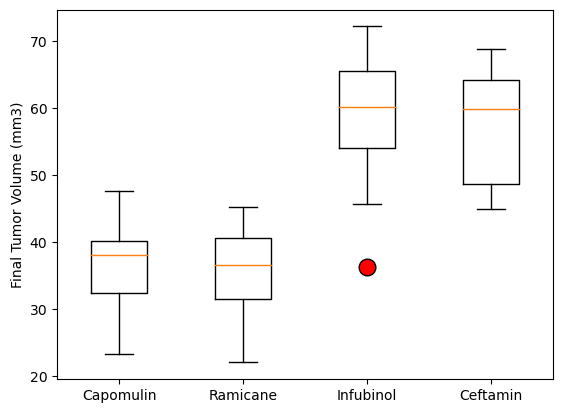

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

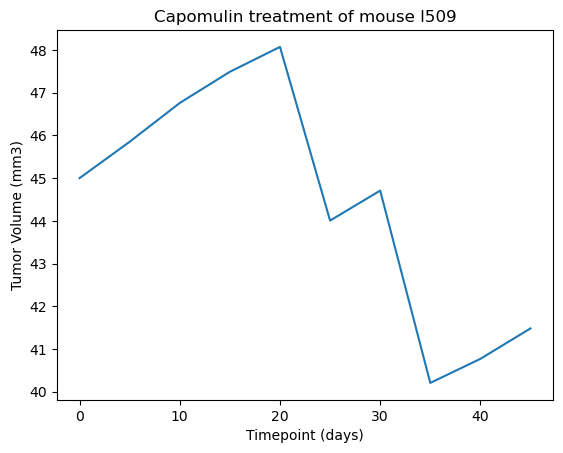

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


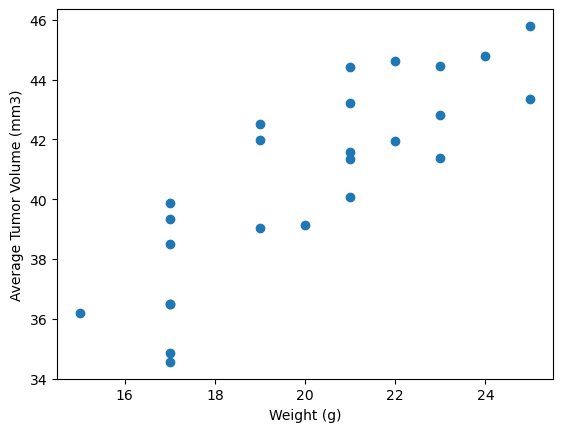

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


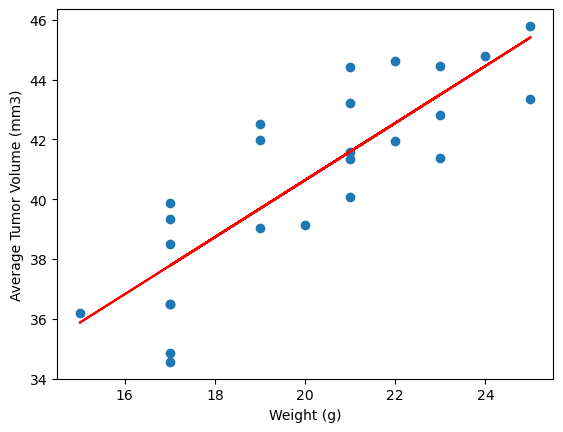

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
